# مدل سازی ماشین لرنینگ بدون اضافه کردن ویژگی های جدید برای سال 2022-2032 و اضافه کردن فیچرهای جدید

## وارد کردن کتابخانه‌ها

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno
import h2o
from h2o.estimators import H2ORandomForestEstimator
import warnings
import sklearn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
warnings.filterwarnings('ignore')

## خواندن داده‌ها

### خواندن داده های 1950 تا 2021

In [2]:
df_estimates = pd.read_excel('../data/WPP2022.xlsx', sheet_name='Estimates', skiprows=16, na_values='...')
# انتخاب تایپ از نوع کشور
df_estimates = df_estimates[df_estimates['Type'] == 'Country/Area'].copy()

# انتخاب ستون های با کوریلیشن کمتر از 0.9
column_list = ["Region, subregion, country or area *",
"ISO3 Alpha-code",
"Year",
"Births (thousands)",
"Population Density, as of 1 July (persons per square km)",
"Population Sex Ratio, as of 1 July (males per 100 females)",
"Population Growth Rate (percentage)",
"Population Annual Doubling Time (years)",
"Rate of Natural Change (per 1,000 population)",
"Crude Birth Rate (births per 1,000 population)",
"Mean Age Childbearing (years)",
"Sex Ratio at Birth (males per 100 female births)",
"Crude Death Rate (deaths per 1,000 population)",
"Under-Five Deaths, under age 5 (thousands)",
"Net Number of Migrants (thousands)",
"Net Migration Rate (per 1,000 population)",
"Life Expectancy at Birth, both sexes (years)"]

df_estimates = df_estimates[column_list].copy()

# حدف مقادیر تکراری
df_estimates.drop_duplicates(subset=['Region, subregion, country or area *', "Year"], keep='first', inplace=True)
df_estimates.reset_index(drop=True, inplace=True)

In [3]:
df_estimates

,"Region, subregion, country or area *",ISO3 Alpha-code,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),"Rate of Natural Change (per 1,000 population)","Crude Birth Rate (births per 1,000 population)",Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,1950.0,116.224,86.864,91.947,2.200,31.507,27.788,51.334,30.995,102.5,23.546,29.001,-13.343,-5.893,40.579
1,Burundi,BDI,1951.0,117.067,88.757,92.145,2.114,32.788,26.799,50.678,30.996,102.5,23.879,30.669,-13.217,-5.721,40.812
2,Burundi,BDI,1952.0,117.770,90.618,92.319,2.036,34.045,26.118,49.933,31.026,102.5,23.815,31.272,-13.715,-5.815,41.003
3,Burundi,BDI,1953.0,119.013,92.451,92.488,1.969,35.203,25.844,49.448,31.030,102.5,23.604,31.644,-14.962,-6.216,41.282
4,Burundi,BDI,1954.0,119.972,94.287,92.650,1.965,35.275,25.536,48.883,31.036,102.5,23.347,31.915,-14.599,-5.948,41.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17059,Wallis and Futuna Islands,WLF,2017.0,0.153,85.257,93.562,-1.106,NaN,5.985,12.713,30.007,104.8,6.728,0.002,-0.201,-16.706,77.531
17060,Wallis and Futuna Islands,WLF,2018.0,0.147,84.396,93.301,-0.923,NaN,5.611,12.381,30.012,104.8,6.770,0.002,-0.171,-14.368,77.861
17061,Wallis and Futuna Islands,WLF,2019.0,0.144,83.671,93.109,-0.802,NaN,6.112,12.189,30.025,104.8,6.077,0.002,-0.171,-14.489,79.617
17062,Wallis and Futuna Islands,WLF,2020.0,0.140,83.246,92.955,-0.215,NaN,5.154,11.997,30.021,104.8,6.843,0.002,-0.083,-7.096,78.764


### خواندن داده های 2022

In [4]:
df_medium = pd.read_excel('../data/WPP2022.xlsx', sheet_name='Medium variant', skiprows=16, na_values='...')

# انتخاب تایپ از نوع کشور
df_medium = df_medium[df_medium['Type'] == 'Country/Area'].copy()

# انتخاب ستون های با کوریلیشن کمتر از 0.9
df_medium = df_medium[column_list].copy()

# انتخاب سال 2022
df_medium = df_medium[(df_medium['Year'] >= 2022) & (df_medium['Year'] <= 2032)].copy()
df_medium.reset_index(drop=True, inplace=True)

# حدف مقادیر تکراری
df_medium.drop_duplicates(subset=['Region, subregion, country or area *', "Year"], keep='first', inplace=True)
df_medium.reset_index(drop=True, inplace=True)

In [5]:
df_medium

,"Region, subregion, country or area *",ISO3 Alpha-code,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),"Rate of Natural Change (per 1,000 population)","Crude Birth Rate (births per 1,000 population)",Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,2022.0,439.648,496.708,98.648,2.695,25.720,26.798,34.109,30.652,102.5,7.311,22.214,2.000,0.155,61.977
1,Burundi,BDI,2023.0,443.059,510.156,98.681,2.648,26.176,26.329,33.467,30.638,102.5,7.138,22.966,2.000,0.151,62.500
2,Burundi,BDI,2024.0,447.212,523.763,98.700,2.617,26.486,26.017,32.902,30.625,102.5,6.885,23.280,2.000,0.147,63.266
3,Burundi,BDI,2025.0,450.531,537.501,98.709,2.562,27.055,25.474,32.300,30.612,102.4,6.826,23.136,2.000,0.143,63.446
4,Burundi,BDI,2026.0,457.042,551.361,98.714,2.530,27.397,25.162,31.941,30.599,102.4,6.779,23.086,2.000,0.140,63.621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,Wallis and Futuna Islands,WLF,2028.0,0.130,80.482,89.052,-0.382,NaN,3.618,11.509,29.998,104.8,7.891,0.001,-0.069,-6.101,80.931
2603,Wallis and Futuna Islands,WLF,2029.0,0.132,80.300,88.751,-0.071,NaN,3.584,11.681,29.996,104.8,8.097,0.001,-0.061,-5.407,81.069
2604,Wallis and Futuna Islands,WLF,2030.0,0.134,80.211,88.462,-0.151,NaN,3.615,11.900,29.995,104.8,8.285,0.001,-0.054,-4.795,81.221
2605,Wallis and Futuna Islands,WLF,2031.0,0.136,80.139,88.183,-0.027,NaN,3.631,12.114,29.993,104.8,8.483,0.001,-0.047,-4.178,81.348


### خواندن داده های gpd

In [6]:
df_gpd = pd.read_csv('../data/initial_cleaning/initial_cleaning_gdp.csv')
df_gpd

,"Region, subregion, country or area *",ISO3 Alpha-code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,162.907576
2,Afghanistan,AFG,1960,62.369375
3,Africa Western and Central,AFW,1960,106.976475
4,Angola,AGO,1960,NaN
...,...,...,...,...
16487,Kosovo,XKX,2021,5269.783901
16488,"Yemen, Rep.",YEM,2021,NaN
16489,South Africa,ZAF,2021,7055.044776
16490,Zambia,ZMB,2021,1137.343633


#### ترکیب gdp با ستون های اولیه

##### ترکیب با دیتاست سال های کوچکتر از 2021

In [7]:
new_df = pd.merge(df_estimates,
                  df_gpd, 
                  on=['ISO3 Alpha-code', 'Year'], how='outer', indicator=True, suffixes=('_estimates', '_gpd'))
new_df[new_df['_merge'] == 'right_only']["Region, subregion, country or area *_gpd"].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Central Europe and the Baltics', 'Channel Islands',
       'Caribbean small states',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'European Union',
       'Fragile and conflict affected situations', 'High income',
       'Heavily indebted poor countries (HIPC)', 'IBRD only',
       'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
       'Not classified',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Late-demographic dividend', 'Middle East & North Africa',
       'Middle income',
       'Middle East & North Africa (excluding high income)',
     

In [8]:
new_df = new_df[new_df['_merge'] != 'right_only'].copy()
new_df.sort_values(by=['_merge'], inplace=True)
new_df.reset_index(drop=True, inplace=True)
new_df.drop(columns=['_merge', "Region, subregion, country or area *_gpd"], inplace=True)
new_df.rename(columns={"Region, subregion, country or area *_estimates": "Region, subregion, country or area *"}, inplace=True)
df_estimates = new_df.copy()
df_estimates

,"Region, subregion, country or area *",ISO3 Alpha-code,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),"Rate of Natural Change (per 1,000 population)","Crude Birth Rate (births per 1,000 population)",Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Life Expectancy at Birth, both sexes (years)",GDP
0,Burundi,BDI,1950.0,116.224,86.864,91.947,2.200,31.507,27.788,51.334,30.995,102.5,23.546,29.001,-13.343,-5.893,40.579,NaN
1,Isle of Man,IMN,1956.0,0.654,90.288,85.942,-1.268,NaN,-2.812,12.611,27.892,105.0,15.423,0.050,-0.511,-9.849,64.856,NaN
2,Isle of Man,IMN,1955.0,0.629,91.404,86.180,-1.190,NaN,-2.886,11.990,27.898,105.0,14.876,0.048,-0.471,-8.974,65.317,NaN
3,Isle of Man,IMN,1954.0,0.669,92.442,86.400,-1.070,NaN,-2.341,12.607,27.924,105.0,14.948,0.054,-0.442,-8.329,64.600,NaN
4,Isle of Man,IMN,1953.0,0.721,93.396,86.613,-0.983,NaN,-1.105,13.446,27.995,105.0,14.551,0.055,-0.468,-8.726,64.867,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17059,Yemen,YEM,1994.0,738.434,29.458,101.047,3.653,18.975,37.348,47.452,30.229,105.9,10.104,83.065,-13.045,-0.838,59.714,267.942533
17060,Yemen,YEM,1995.0,743.222,30.500,101.157,3.305,20.973,36.429,46.071,30.174,105.9,9.642,82.371,-55.482,-3.439,60.453,264.466191
17061,Yemen,YEM,1996.0,720.385,31.468,101.270,2.948,23.512,33.930,43.273,30.102,106.0,9.343,80.056,-75.067,-4.509,60.568,348.234729
17062,Yemen,YEM,1998.0,732.046,33.351,101.479,2.840,24.407,32.812,41.478,30.121,106.0,8.666,75.556,-79.125,-4.483,61.375,359.217055


##### ترکیب با دیتاست سال 2022

In [9]:
new_df = pd.merge(df_medium,
                  df_gpd, 
                  on=['ISO3 Alpha-code', 'Year'], how='outer', indicator=True, suffixes=('_medium', '_gpd'))
new_df[new_df['_merge'] == 'right_only']["Region, subregion, country or area *_gpd"].unique()
new_df = new_df[new_df['_merge'] != 'right_only'].copy()
new_df.sort_values(by=['_merge'], inplace=True)
new_df.reset_index(drop=True, inplace=True)
new_df.drop(columns=['_merge', "Region, subregion, country or area *_gpd"], inplace=True)
new_df.rename(columns={"Region, subregion, country or area *_medium": "Region, subregion, country or area *"}, inplace=True)
df_medium = new_df.copy()
df_medium

,"Region, subregion, country or area *",ISO3 Alpha-code,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),"Rate of Natural Change (per 1,000 population)","Crude Birth Rate (births per 1,000 population)",Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Life Expectancy at Birth, both sexes (years)",GDP
0,Burundi,BDI,2022.0,439.648,496.708,98.648,2.695,25.720,26.798,34.109,30.652,102.5,7.311,22.214,2.000,0.155,61.977,NaN
1,Netherlands,NLD,2028.0,184.899,530.538,99.178,0.243,NaN,0.755,10.359,31.742,105.4,9.604,0.547,29.998,1.681,83.269,NaN
2,Netherlands,NLD,2029.0,184.243,531.777,99.223,0.223,NaN,0.554,10.299,31.743,105.4,9.745,0.532,29.998,1.677,83.400,NaN
3,Netherlands,NLD,2030.0,183.908,532.916,99.265,0.205,NaN,0.379,10.258,31.743,105.5,9.879,0.517,29.998,1.673,83.542,NaN
4,Netherlands,NLD,2031.0,183.015,533.950,99.305,0.183,NaN,0.158,10.188,31.743,105.5,10.030,0.502,29.998,1.670,83.671,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,Sri Lanka,LKA,2024.0,295.432,350.040,92.749,0.242,NaN,5.936,13.436,29.483,104.4,7.500,1.818,-77.495,-3.525,77.001,NaN
2603,Sri Lanka,LKA,2025.0,294.245,350.853,92.677,0.222,NaN,5.737,13.351,29.489,104.4,7.614,1.757,-77.495,-3.516,77.193,NaN
2604,Sri Lanka,LKA,2026.0,291.602,351.589,92.611,0.197,NaN,5.472,13.204,29.495,104.4,7.732,1.692,-77.495,-3.509,77.385,NaN
2605,Nepal,NPL,2030.0,563.309,225.120,91.923,0.865,80.133,10.513,16.987,25.614,104.8,6.474,9.144,-62.012,-1.870,72.624,NaN


## بررسی داده ها

### داده های سال های 1950-2021

Region, subregion, country or area *                             0
ISO3 Alpha-code                                                  0
Year                                                             0
Births (thousands)                                              72
Population Density, as of 1 July (persons per square km)         0
Population Sex Ratio, as of 1 July (males per 100 females)      72
Population Growth Rate (percentage)                              0
Population Annual Doubling Time (years)                       3374
Rate of Natural Change (per 1,000 population)                   72
Crude Birth Rate (births per 1,000 population)                  72
Mean Age Childbearing (years)                                   72
Sex Ratio at Birth (males per 100 female births)                72
Crude Death Rate (deaths per 1,000 population)                  72
Under-Five Deaths, under age 5 (thousands)                      72
Net Number of Migrants (thousands)                            

//////////////////////////////////////


Region, subregion, country or area *                           object
ISO3 Alpha-code                                                object
Year                                                          float64
Births (thousands)                                            float64
Population Density, as of 1 July (persons per square km)      float64
Population Sex Ratio, as of 1 July (males per 100 females)    float64
Population Growth Rate (percentage)                           float64
Population Annual Doubling Time (years)                       float64
Rate of Natural Change (per 1,000 population)                 float64
Crude Birth Rate (births per 1,000 population)                float64
Mean Age Childbearing (years)                                 float64
Sex Ratio at Birth (males per 100 female births)              float64
Crude Death Rate (deaths per 1,000 population)                float64
Under-Five Deaths, under age 5 (thousands)                    float64
Net Number of Migran

//////////////////////////////////////


<Axes: >

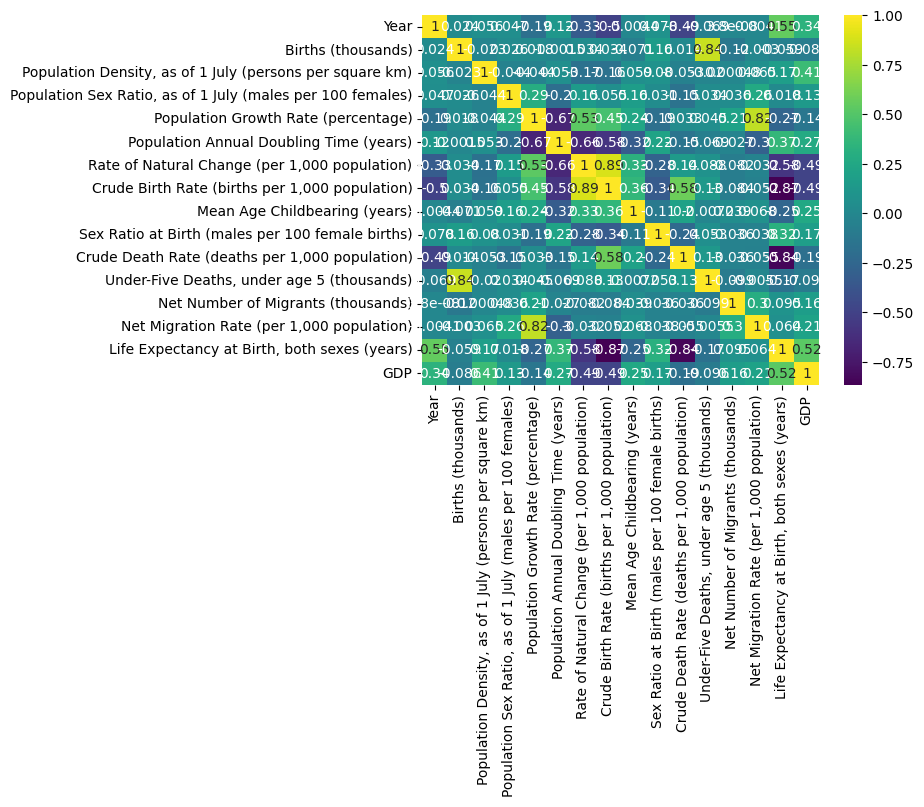

In [10]:
# بررسی تعداد مقادیر نال هر یک از ستون ها
display(df_estimates.isna().sum())
print("//////////////////////////////////////")

# بررسی dtype ستون ها
display(df_estimates.dtypes)
print("//////////////////////////////////////")

# بررسی کوریلیشن ستون ها
sns.heatmap(df_estimates.corr(), annot=True, cmap='viridis')

### داده های سال 2022

Region, subregion, country or area *                             0
ISO3 Alpha-code                                                  0
Year                                                             0
Births (thousands)                                              11
Population Density, as of 1 July (persons per square km)         0
Population Sex Ratio, as of 1 July (males per 100 females)      11
Population Growth Rate (percentage)                              0
Population Annual Doubling Time (years)                       1049
Rate of Natural Change (per 1,000 population)                   11
Crude Birth Rate (births per 1,000 population)                  11
Mean Age Childbearing (years)                                   11
Sex Ratio at Birth (males per 100 female births)                11
Crude Death Rate (deaths per 1,000 population)                  11
Under-Five Deaths, under age 5 (thousands)                      11
Net Number of Migrants (thousands)                            

Region, subregion, country or area *                           object
ISO3 Alpha-code                                                object
Year                                                          float64
Births (thousands)                                            float64
Population Density, as of 1 July (persons per square km)      float64
Population Sex Ratio, as of 1 July (males per 100 females)    float64
Population Growth Rate (percentage)                           float64
Population Annual Doubling Time (years)                       float64
Rate of Natural Change (per 1,000 population)                 float64
Crude Birth Rate (births per 1,000 population)                float64
Mean Age Childbearing (years)                                 float64
Sex Ratio at Birth (males per 100 female births)              float64
Crude Death Rate (deaths per 1,000 population)                float64
Under-Five Deaths, under age 5 (thousands)                    float64
Net Number of Migran

//////////////////////////////////////


<Axes: >

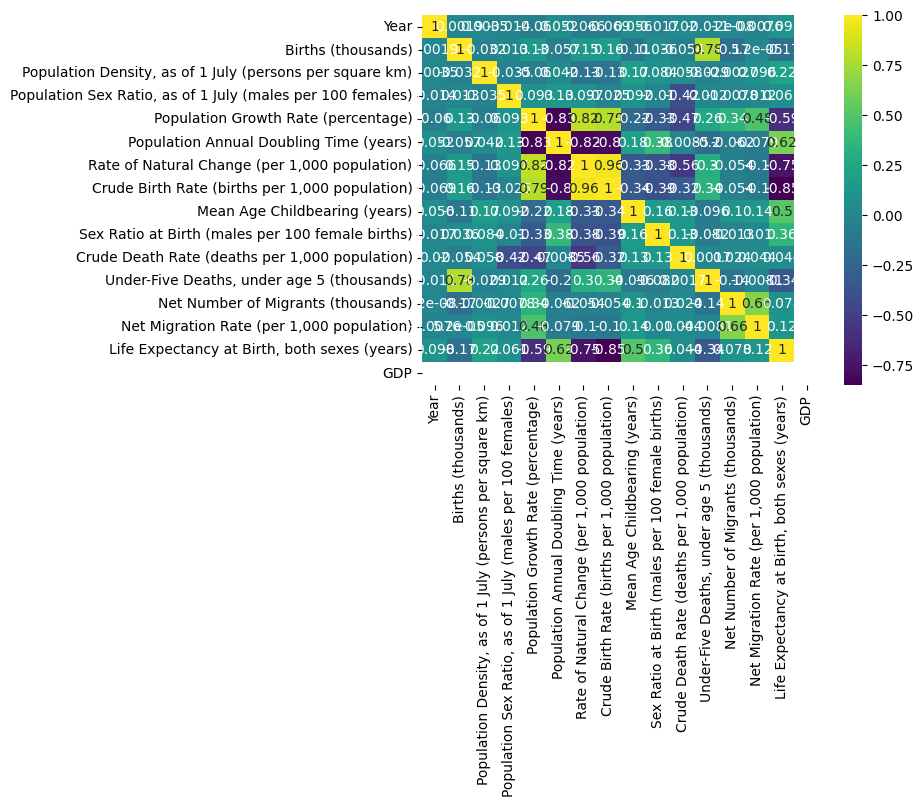

In [11]:
# بررسی تعداد مقادیر نال هر یک از ستون ها
print(df_medium.isna().sum())
print("//////////////////////////////////////")

# بررسی dtype ستون ها
display(df_medium.dtypes)
print("//////////////////////////////////////")

# بررسی کوریلیشن ستون ها
sns.heatmap(df_medium.corr(), annot=True, cmap='viridis')

## پیش پردازش

In [12]:
# حذف ستون: Population Annual Doubling Time (years)
df_estimates.drop(columns=["Population Annual Doubling Time (years)", "ISO3 Alpha-code"], inplace=True)
df_medium.drop(columns=["Population Annual Doubling Time (years)", "ISO3 Alpha-code"], inplace=True)

## مدل سازی با h20

In [13]:
target = "Life Expectancy at Birth, both sexes (years)"
train = df_estimates.copy()
train.dropna(subset=["Life Expectancy at Birth, both sexes (years)"], inplace=True)
test = df_medium.copy()
test.dropna(subset=["Life Expectancy at Birth, both sexes (years)"], inplace=True)

In [14]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.6+9-LTS-190, mixed mode, sharing)
  Starting server from D:\Projects\LifeExpectancy\venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\amira\AppData\Local\Temp\tmpg8my5nde
  JVM stdout: C:\Users\amira\AppData\Local\Temp\tmpg8my5nde\h2o_amira_started_from_python.out
  JVM stderr: C:\Users\amira\AppData\Local\Temp\tmpg8my5nde\h2o_amira_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Tehran
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_amira_jnsyk6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.975 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [15]:
h2o_train_data = h2o.H2OFrame(train)
h2o_test_data = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [17]:
# type of h2o_test_data columns
print(h2o_test_data.types)
# change type of col GDP to real
h2o_test_data['GDP'] = h2o_test_data['GDP'].asnumeric()

{'Region, subregion, country or area *': 'enum', 'Year': 'int', 'Births (thousands)': 'real', 'Population Density, as of 1 July (persons per square km)': 'real', 'Population Sex Ratio, as of 1 July (males per 100 females)': 'real', 'Population Growth Rate (percentage)': 'real', 'Rate of Natural Change (per 1,000 population)': 'real', 'Crude Birth Rate (births per 1,000 population)': 'real', 'Mean Age Childbearing (years)': 'real', 'Sex Ratio at Birth (males per 100 female births)': 'real', 'Crude Death Rate (deaths per 1,000 population)': 'real', 'Under-Five Deaths, under age 5 (thousands)': 'real', 'Net Number of Migrants (thousands)': 'real', 'Net Migration Rate (per 1,000 population)': 'real', 'Life Expectancy at Birth, both sexes (years)': 'real', 'GDP': 'real'}


AttributeError: 'H2OFrame' object has no attribute 'asenumerated'

In [ ]:
X_columns = h2o_train_data.columns
X_columns.remove(target)

x_test_columns = h2o_test_data.columns
x_test_columns.remove(target)


In [ ]:
model = H2ORandomForestEstimator(ntrees=100, max_depth=20, nfolds=5, seed=42)
model.train(x=X_columns, y=target, training_frame=h2o_train_data)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1676646585752_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         1.3907e+07             20           20           20            8751          10113         9610.27

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.39153467376208234
RMSE: 0.6257273158190254
MAE: 0.36048939761747845
RMSLE: 0.01458918028532678
Mean Residual Deviance: 0.39153467376208234

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.4643987080472083
RMSE: 0.6814680535778682
MAE: 0.38844732553384204
RMSLE: 0.016438691365104185
Mean Residual Deviance: 0.4643987080472083

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.388347   0.0147958    0.405592      0.375349      0.401747      0.385608      0.373439
mean_residual_deviance  0.463797   0.0931999    0.584591      0.388839      0.538173      0.433507      0.373876
mse                     0.463797   0.0931999    0.584591      0.388839      0.538173      0.433507      0.373876
r2                      0.996799   0.000640079  0.996008      0.997246      0.996235      0.997048      0.997457
residual_deviance       0.463797   0.0931999    0.584591      0.388839      0.538173      0.433507      0.373876
rmse                    0.678325   0.0677548    0.764585      0.623569      0.733602      0.658412      0.611454
rmsle                   0.0160807  0.00378458   0.0225524     0.0160798     0.0144581     0.0129411     0.014372

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2023-02-17 18:41:27  1 min 32.595 sec  0                  nan              nan             nan
    2023-02-17 18:41:28  1 min 32.992 sec  1                  1.55798          0.868878        2.42729
    2023-02-17 18:41:28  1 min 33.221 sec  2                  1.4465           0.838058        2.09235
    2023-02-17 18:41:28  1 min 33.486 sec  3                  1.32538          0.779791        1.75664
    2023-02-17 18:41:29  1 min 33.771 sec  4                  1.2916           0.750635        1.66822
    2023-02-17 18:41:29  1 min 34.081 sec  5                  1.28532          0.71822         1.65204
    2023-02-17 18:41:29  1 min 34.368 sec  6                  1.19552          0.672899        1.42927
    2023-02-17 18:41:29  1 min 34.614 sec  7                  1.15846          0.655049        1.34204
    2023-02-17 18:41:30  1 min 34.877 sec  8                  1.07082          0.61842         1.14667
    2023-02-17 18:41:30  1 min 35.113 sec  9                  1.04363          0.601115        1.08917
    2023-02-17 18:41:30  1 min 35.383 sec  10                 1.0181           0.581417        1.03652
    2023-02-17 18:41:31  1 min 35.656 sec  11                 0.971901         0.562874        0.944591
    2023-02-17 18:41:31  1 min 35.987 sec  12                 0.933388         0.546481        0.871214
    2023-02-17 18:41:31  1 min 36.329 sec  13                 0.919959         0.535794        0.846325
    2023-02-17 18:41:35  1 min 40.493 sec  29                 0.73749          0.438803        0.543891
    2023-02-17 18:41:40  1 min 44.743 sec  46                 0.693272         0.404467        0.480626
    2023-02-17 18:41

In [ ]:
# predict
pred_train = model.predict(h2o_train_data)
pred_test = model.predict(h2o_test_data)



drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# compare with test data
pred_df_test = pred_test.as_data_frame()
pred_df_train = pred_train.as_data_frame()

# r^2 score train
print("r^2 score_train: ", r2_score(train[target], pred_df_train['predict']))
# r^2 score test
print("r^2 score_test: ", r2_score(test[target], pred_df_test['predict']))
print("//////////////////////////////////////")

# mean absolute error train
print("mean absolute error_train: ", mean_absolute_error(train[target], pred_df_train['predict']))
# mean absolute error test
print("mean absolute error_test: ", mean_absolute_error(test[target], pred_df_test['predict']))
print("//////////////////////////////////////")

# mean squared error train
print("mean squared error_train: ", mean_squared_error(train[target], pred_df_train['predict']))
# mean squared error test
print("mean squared error_test: ", mean_squared_error(test[target], pred_df_test['predict']))
print("//////////////////////////////////////")

# mean absolute percentage error train
print("mean absolute percentage error_train: ", mean_absolute_percentage_error(train[target], pred_df_train['predict']))
# mean absolute percentage error test
print("mean absolute percentage error_test: ", mean_absolute_percentage_error(test[target], pred_df_test['predict']))
print("//////////////////////////////////////")



r^2 score_train:  0.9995660445526295
r^2 score_test:  0.6640866811690107
//////////////////////////////////////
mean absolute error_train:  0.14701033457008014
mean absolute error_test:  3.4858039247971293
//////////////////////////////////////
mean squared error_train:  0.06288771960394801
mean squared error_test:  18.074897390950802
//////////////////////////////////////
mean absolute percentage error_train:  0.0025923132562419644
mean absolute percentage error_test:  0.044372498758441445
//////////////////////////////////////


### رسم نمودار

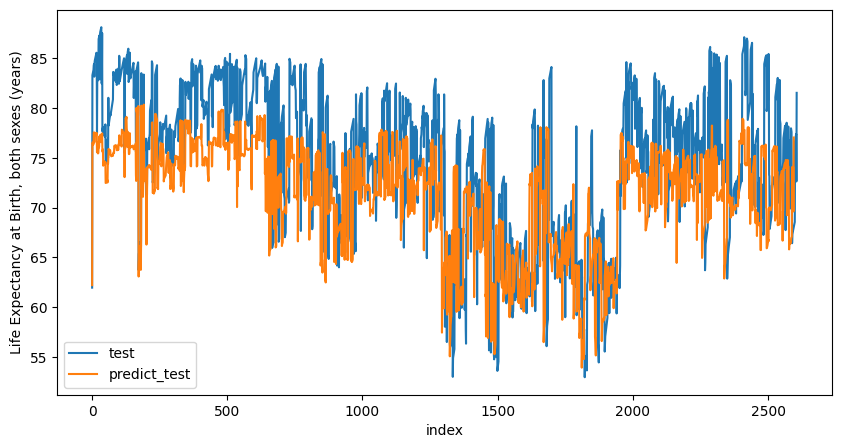

In [ ]:
# plot
plt.figure(figsize=(10, 5))
plt.plot(test[target], label='test')
plt.plot(pred_df_test['predict'], label='predict_test')
plt.xlabel('index')
plt.ylabel(target)
plt.legend()